In [ ]:
# Set seed to ensure consistency when using PyTorch

import torch
import random
import numpy as np

# ensure consistency when using PyTorch
def set_seed(seed):
  # PyTorch seed
  torch.manual_seed(seed)
  torch.cuda.manual_seed_all(seed)

  # Numpy seed
  np.random.seed(seed)

  # Python random seed
  random.seed(seed)

  # CuDNN (if using CUDA)
  if torch.cuda.is_available():
      print(666)
      torch.backends.cudnn.deterministic = True
      torch.backends.cudnn.benchmark = False

# Usage
seed = 2
set_seed(seed)

In [ ]:
import pandas as pd
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.naive_bayes import MultinomialNB
from sklearn.metrics import classification_report, accuracy_score
import string
import matplotlib.pyplot as plt
from wordcloud import WordCloud

In [ ]:
import pandas as pd

# Load the CSV file
file_path = '/content/comments.csv'
data = pd.read_csv(file_path)

# Displaying the first few rows of the dataset to understand its structure
data.head()


,Paper_id,Comments,Label
0,12-851,Title: Knowledge of obstetric danger signs and...,positive
1,12-851,This study presented data concerning the exten...,neutral
2,12-322,I appreciate the authors for undertaking this ...,negative
3,12-322,The authors present the results of a cross-sec...,neutral
4,12-3,Introduction:\nThe subject matter of this manu...,positive


In [ ]:
from sklearn.model_selection import train_test_split
from nltk.corpus import stopwords
from nltk.stem import PorterStemmer
from nltk.tokenize import word_tokenize
from nltk.stem import WordNetLemmatizer
import nltk
import string
import re

# Download necessary NLTK data
nltk.download('punkt')
nltk.download('wordnet')
nltk.download('stopwords')


def text_cleaning(text):
    # Lowercasing
    text = text.lower()

    # Remove punctuation using regex
    text = re.sub(r'[^\w\s]', '', text)

    # Tokenization using regex
    tokens = re.findall(r'\w+', text)

    # Remove stop words and apply stemming
    stop_words = set(stopwords.words('english'))
    porter = PorterStemmer()
    cleaned_tokens = [porter.stem(w) for w in tokens if w not in stop_words]

    return ' '.join(cleaned_tokens)


# Applying enhanced preprocessing to the comments
data['Cleaned_Comments'] = data['Comments'].apply(text_cleaning)

# Splitting the data into train and test sets
train_data, test_data = train_test_split(data, test_size=0.25, random_state=42)

# Vectorizing the comments using TF-IDF with bi-grams
vectorizer = TfidfVectorizer(ngram_range=(1, 2))
X_train = vectorizer.fit_transform(train_data['Cleaned_Comments'])
X_test = vectorizer.transform(test_data['Cleaned_Comments'])

# Labels
y_train = train_data['Label']
y_test = test_data['Label']

# Training a Multinomial Naive Bayes classifier with default hyperparameters
model = MultinomialNB()
model.fit(X_train, y_train)

# Predicting the test data
predictions = model.predict(X_test)

# Comparing with original labels
comparison = pd.DataFrame({'Original Label': y_test, 'Predicted Label': predictions})


# Evaluating the model
accuracy = accuracy_score(y_test, predictions)
report = classification_report(y_test, predictions)


print(comparison)
print(f"Accuracy: {accuracy}")
print(report)



   Original Label Predicted Label
15        neutral         neutral
9        positive         neutral
0        positive         neutral
8         neutral         neutral
17        neutral         neutral
12        neutral         neutral
Accuracy: 0.6666666666666666
              precision    recall  f1-score   support

     neutral       0.67      1.00      0.80         4
    positive       0.00      0.00      0.00         2

    accuracy                           0.67         6
   macro avg       0.33      0.50      0.40         6
weighted avg       0.44      0.67      0.53         6



[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package wordnet to /root/nltk_data...
[nltk_data]   Package wordnet is already up-to-date!
[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-

Model Selection: Experiment with different machine learning models. Naive Bayes is simple and effective for text classification, but other models like Support Vector Machines (SVM), Logistic Regression, or even neural network-based models might yield better results.

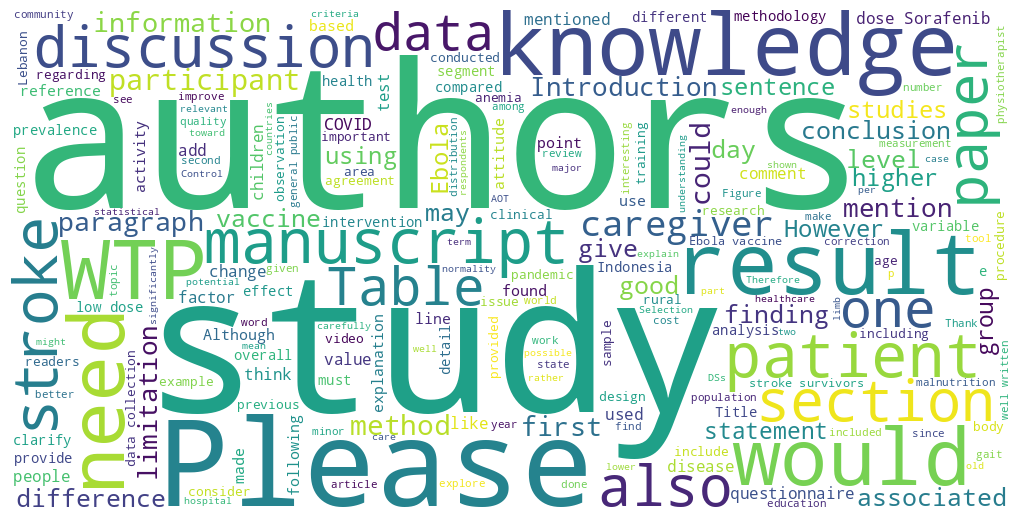

In [ ]:
# Combine all comments into a single string
all_comments = ' '.join(data['Comments'])

# Generate the word cloud
wordcloud = WordCloud(width = 1000, height = 500,
                      background_color='white',
                      stopwords=set(stopwords.words('english')),
                      min_font_size=10).generate(all_comments)

# Display the WordCloud
plt.figure(figsize=(10,5), facecolor=None)
plt.imshow(wordcloud)
plt.axis("off")
plt.tight_layout(pad=0)

plt.show()